In [1]:
# importanting the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Loading the dataset
df = pd.read_csv('churn.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 12)

In [4]:
# drop columns
df = df.drop(['customer_id'], axis=1)

In [5]:
# null values count
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
# column data types
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [7]:
#dulicate values
df.duplicated().sum()

np.int64(0)

In [8]:
# descriptive statistics
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


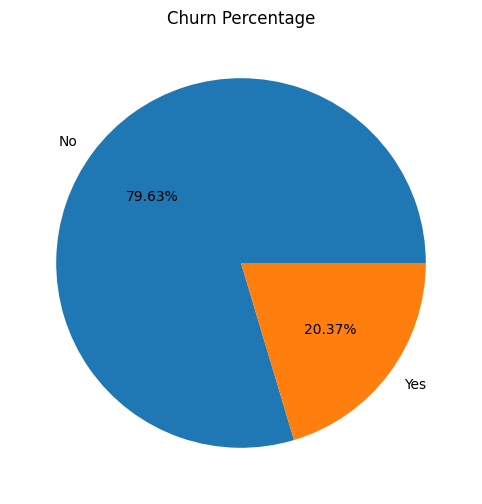

In [10]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

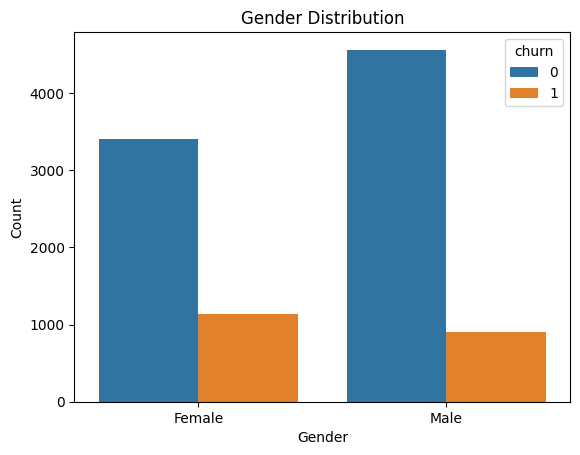

In [11]:
# gender and customer churn
sns.countplot(x = 'gender',data = df,hue = 'churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

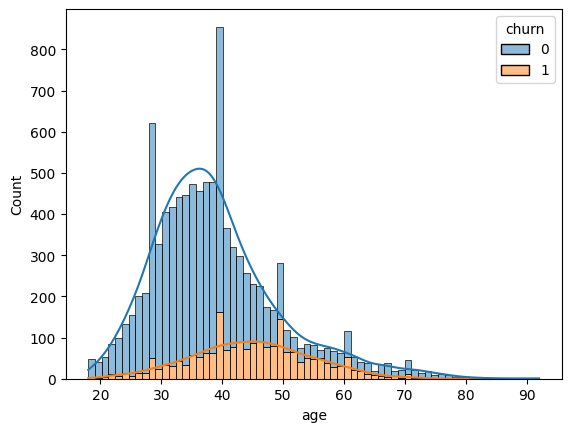

In [12]:
# histogram for age distribution
sns.histplot(data=df,x='age',hue='churn',multiple='stack',kde=True)

<Axes: xlabel='churn', ylabel='credit_score'>

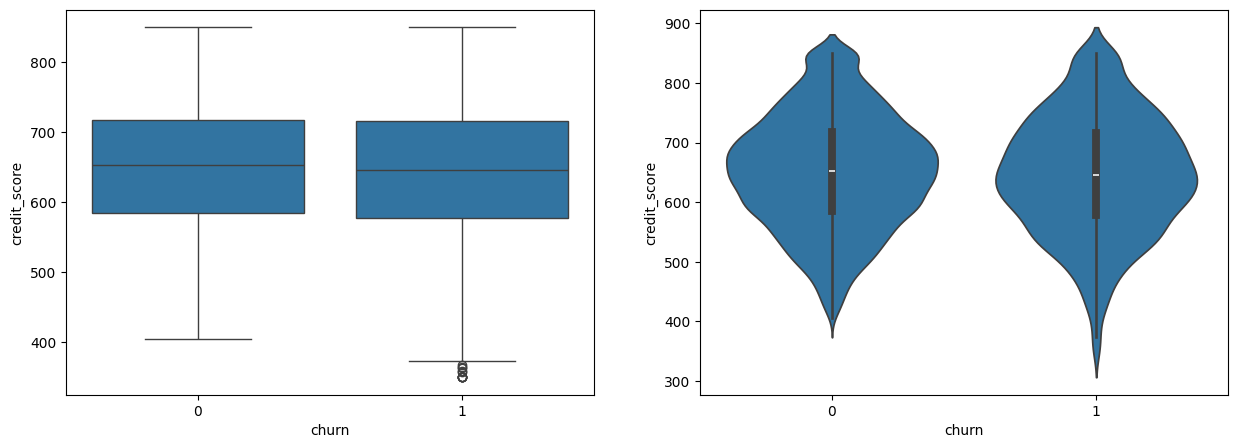

In [13]:
# Credit Score 
fig ,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='churn',y='credit_score',data=df,ax=ax[0])
sns.violinplot(x='churn',y='credit_score',data=df,ax=ax[1])

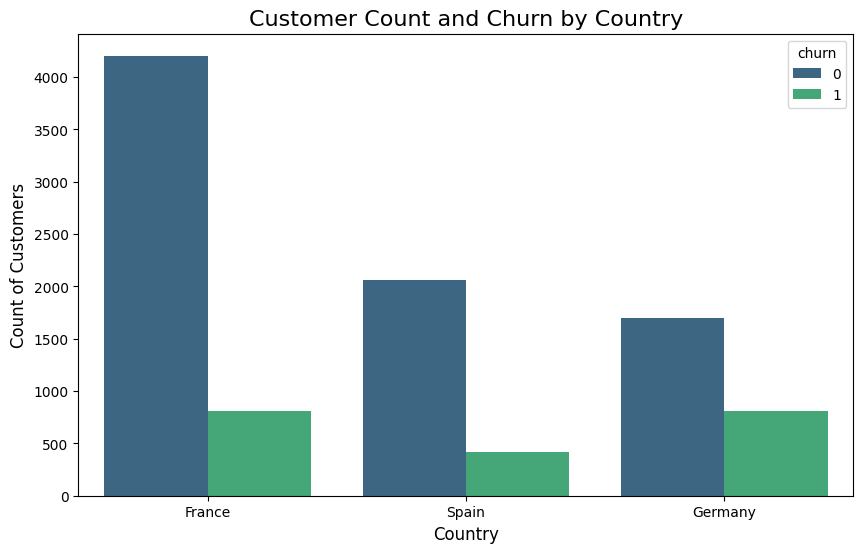

In [14]:
# Customer location
plt.figure(figsize=(10,6)) # Give it a good size
sns.countplot(x = 'country', hue='churn', data = df, palette='viridis') # Added palette
plt.title('Customer Count and Churn by Country', fontsize=16) # More descriptive title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count of Customers', fontsize=12)
plt.show()


Churn Percentage by Country:
   country     churn  churn_percentage
0   France  0.161548         16.154767
1  Germany  0.324432         32.443204
2    Spain  0.166734         16.673395


C:\Users\MIHIR\AppData\Local\Temp\ipykernel_17288\1069199399.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='churn_percentage', data=churn_by_country, palette='coolwarm')


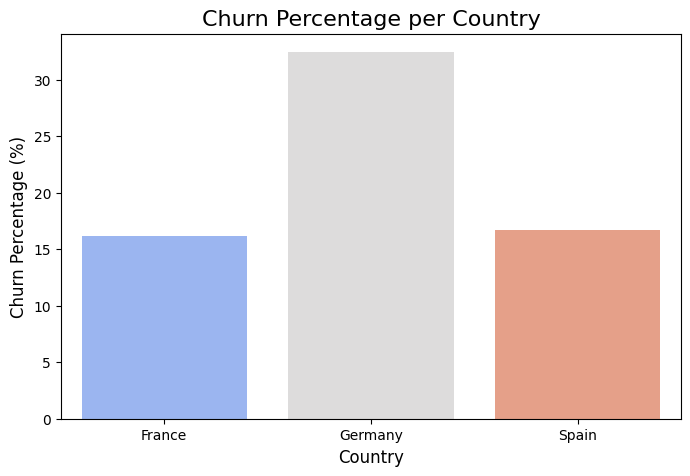

In [15]:
# Calculate churn rate per country
churn_by_country = df.groupby('country')['churn'].mean().reset_index()
churn_by_country['churn_percentage'] = churn_by_country['churn'] * 100
print("\nChurn Percentage by Country:")
print(churn_by_country)

# You could then plot this percentage as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='country', y='churn_percentage', data=churn_by_country, palette='coolwarm')
plt.title('Churn Percentage per Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Churn Percentage (%)', fontsize=12)
plt.show()

<Axes: xlabel='tenure', ylabel='count'>

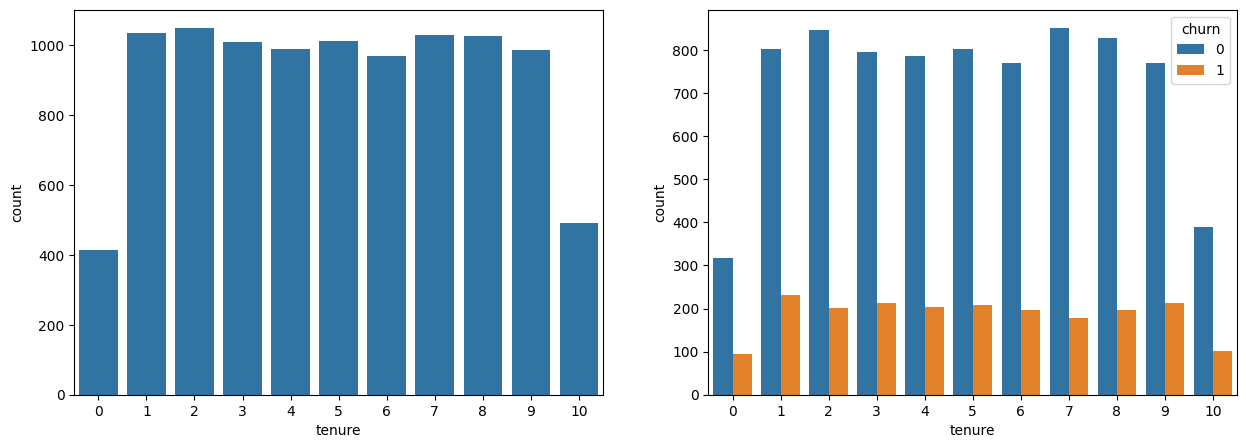

In [16]:
# Tenure
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='tenure',data=df,ax=ax[0])
sns.countplot(x='tenure',hue='churn',data=df,ax=ax[1])

C:\Users\MIHIR\AppData\Local\Temp\ipykernel_17288\32255485.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tenure', y='churn_percentage', data=churn_by_tenure, palette='coolwarm')


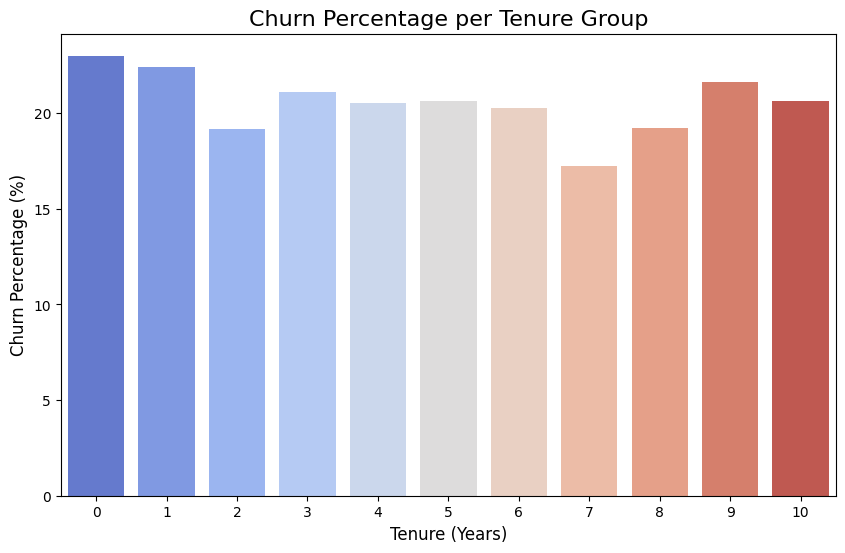

In [17]:
# Calculate churn rate per tenure group
churn_by_tenure = df.groupby('tenure')['churn'].mean().reset_index()
churn_by_tenure['churn_percentage'] = churn_by_tenure['churn'] * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='tenure', y='churn_percentage', data=churn_by_tenure, palette='coolwarm')
plt.title('Churn Percentage per Tenure Group', fontsize=16)
plt.xlabel('Tenure (Years)', fontsize=12)
plt.ylabel('Churn Percentage (%)', fontsize=12)
plt.show()

<Axes: xlabel='balance', ylabel='Count'>

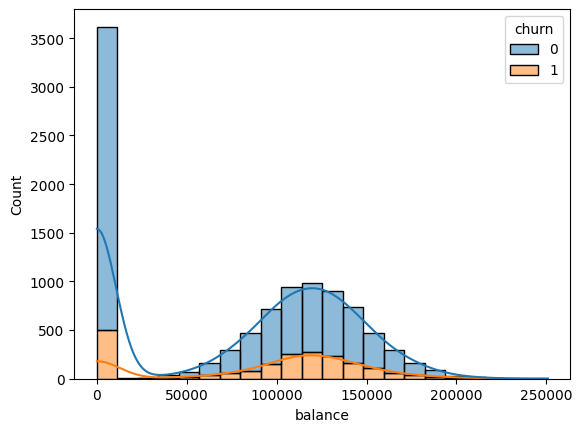

In [18]:
# Bank balance
sns.histplot(data=df, x = 'balance', hue='churn',multiple='stack',kde=True)

<Axes: xlabel='products_number', ylabel='count'>

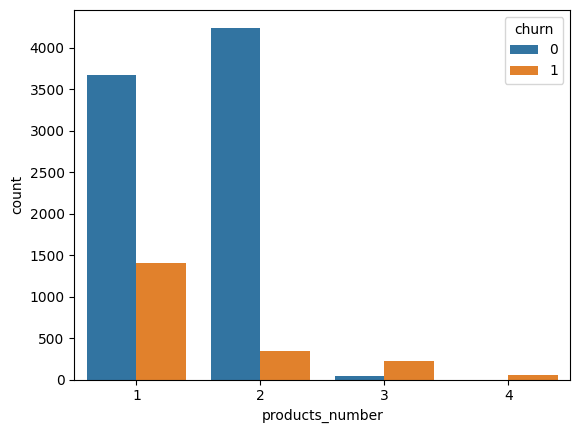

In [19]:
# Number of products purchased
sns.countplot(x='products_number',hue='churn',data=df)

<Axes: xlabel='credit_card', ylabel='count'>

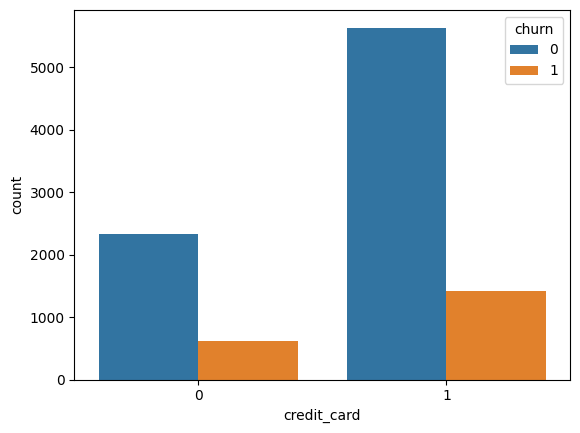

In [20]:
# Customer with/without credit card
sns.countplot(x=df['credit_card'],hue=df['churn'])

<Axes: xlabel='active_member', ylabel='count'>

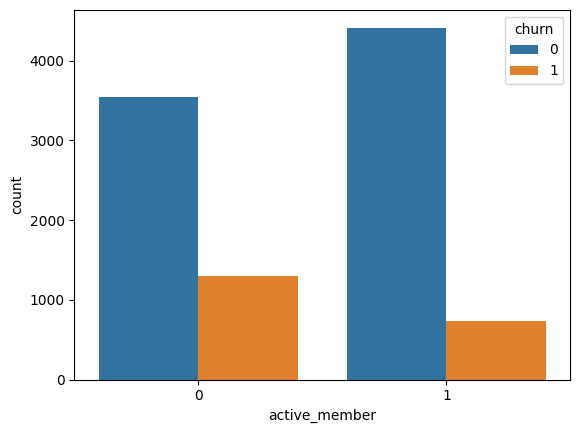

In [21]:
# Active Members
sns.countplot(x='active_member',hue='churn',data=df)


Churn Percentage by Active Member Status:
   active_member     churn  churn_percentage
0              0  0.268509         26.850897
1              1  0.142691         14.269074


C:\Users\MIHIR\AppData\Local\Temp\ipykernel_17288\261384893.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='active_member', y='churn_percentage', data=churn_by_active, palette='mako')


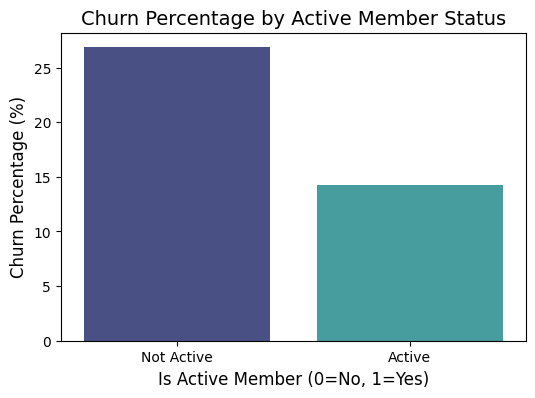

In [22]:
# Calculate churn rate by active member status
churn_by_active = df.groupby('active_member')['churn'].mean().reset_index()
churn_by_active['churn_percentage'] = churn_by_active['churn'] * 100
print("\nChurn Percentage by Active Member Status:")
print(churn_by_active)

plt.figure(figsize=(6, 4))
sns.barplot(x='active_member', y='churn_percentage', data=churn_by_active, palette='mako')
plt.title('Churn Percentage by Active Member Status', fontsize=14)
plt.xlabel('Is Active Member (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Churn Percentage (%)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Active', 'Active']) # Make x-axis labels more readable
plt.show()

<Axes: xlabel='estimated_salary', ylabel='Count'>

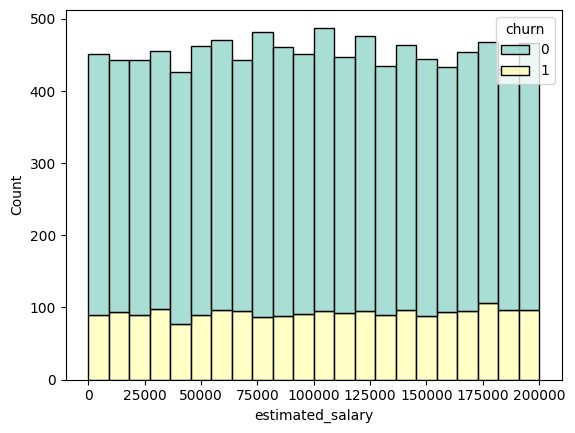

In [23]:
# Estimated Salary
sns.histplot(data=df,x='estimated_salary',hue='churn',multiple='stack',palette='Set3')

In [24]:
# Data Preprocessing - 2
# Label encoding the variables
variables = ['country','gender']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in variables:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

country [0 2 1]
gender [0 1]


In [25]:
# normalize the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['credit_score','balance','estimated_salary']] = scaler.fit_transform(df[['credit_score','balance','estimated_salary']])

In [26]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


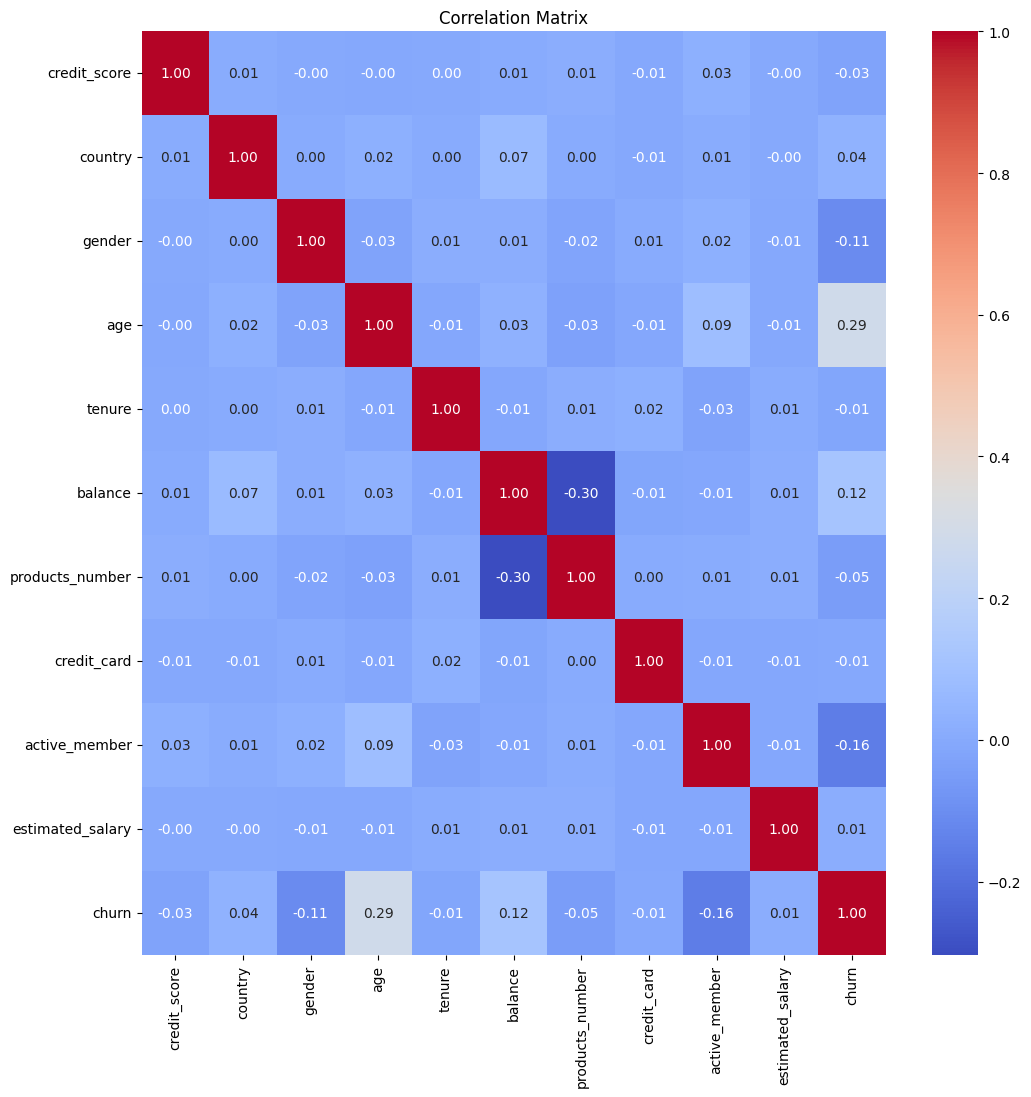

In [27]:
# Coorelation Matrix Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('churn',axis=1),df['churn'],test_size=0.3,random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
# creating Decision Tree Classifer object
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth':[2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
    'criterion' : ['gini','entropy'],
    'random_state': [42]
}

#Creating grid search object
grid_dtree = GridSearchCV(dtree,param_grid,cv=5,scoring = 'roc_auc',n_jobs=-1,verbose = 1)

#Fitting the grid search object to the training data
grid_dtree.fit(X_train,y_train)

# Printing the best parameters
print('Best parameters found: ',grid_dtree.best_params_)

# This is your truly optimized Decision Tree model, ready for testing.
best_dtree_model = grid_dtree.best_estimator_
print("\n--- Best Decision Tree Model Details ---")
print(best_dtree_model)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'random_state': 42}

--- Best Decision Tree Model Details ---
DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)


In [30]:
# 1. Make predictions on the test set
y_pred_best_dtree = best_dtree_model.predict(X_test)
y_prob_best_dtree = best_dtree_model.predict_proba(X_test)[:, 1]

# 2. Calculate and print key evaluation metrics

# Test Accuracy (Overall correct predictions)
accuracy = accuracy_score(y_test, y_pred_best_dtree)
print(f"\nTest Accuracy: {accuracy:.4f}")

# ROC AUC Score (Crucial for imbalanced churn data - measures model's ability to distinguish classes)
roc_auc = roc_auc_score(y_test, y_prob_best_dtree)
print(f"Test ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix (Detailed breakdown of correct/incorrect predictions)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_dtree))

# Classification Report (Precision, Recall, F1-score for each class - especially important for Churn (Class 1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_dtree))



Test Accuracy: 0.8613
Test ROC AUC Score: 0.8376

Confusion Matrix:
[[2359   57]
 [ 359  225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.80      0.39      0.52       584

    accuracy                           0.86      3000
   macro avg       0.83      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



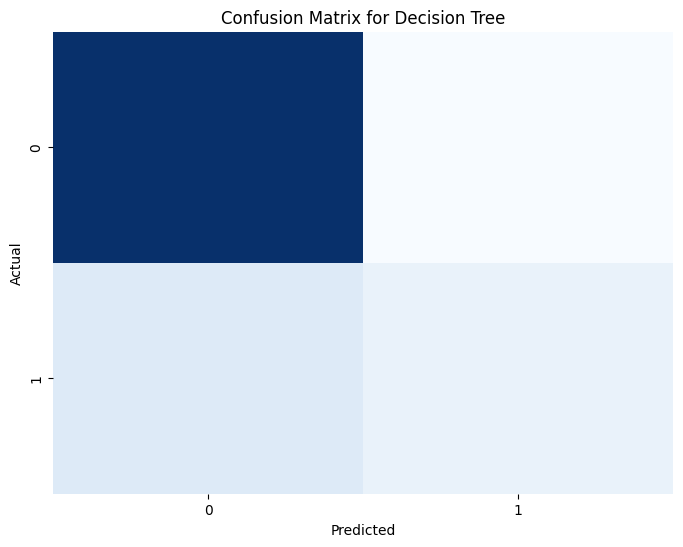

In [31]:
#confusion matrix heatmap
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_best_dtree), 
            fmt='d', 
            cmap='Blues', 
            cbar=False 
           )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

<Axes: xlabel='churn', ylabel='Density'>

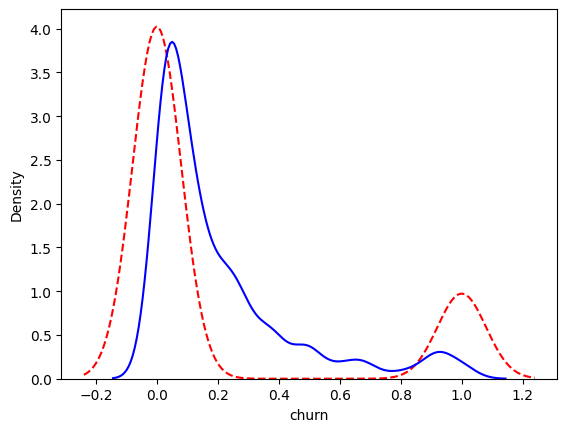

In [32]:
# Plot the actual values (binary 0/1, just for context)
sns.kdeplot(x=y_test, color='r', label='Actual Churn (0 or 1)', linestyle='--') # Dashed line for actual

# Plot the predicted PROBABILITIES (y_prob_best_dtree)
sns.kdeplot(x=y_prob_best_dtree, color='b', label='Predicted Churn Probability')


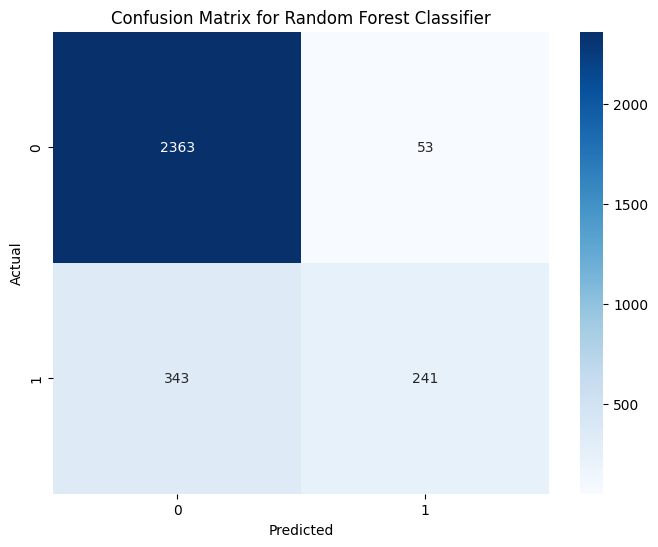

In [33]:
from sklearn.ensemble import RandomForestClassifier 

# Initialize, train, and predict with RandomForestClassifier
rfc = RandomForestClassifier(min_samples_leaf=8, max_depth=10, random_state=0, criterion='entropy')
rfc.fit(X_train, y_train) 
y_pred_rfc = rfc.predict(X_test) 

# Create and show the Confusion Matrix Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

<Axes: xlabel='churn', ylabel='Density'>

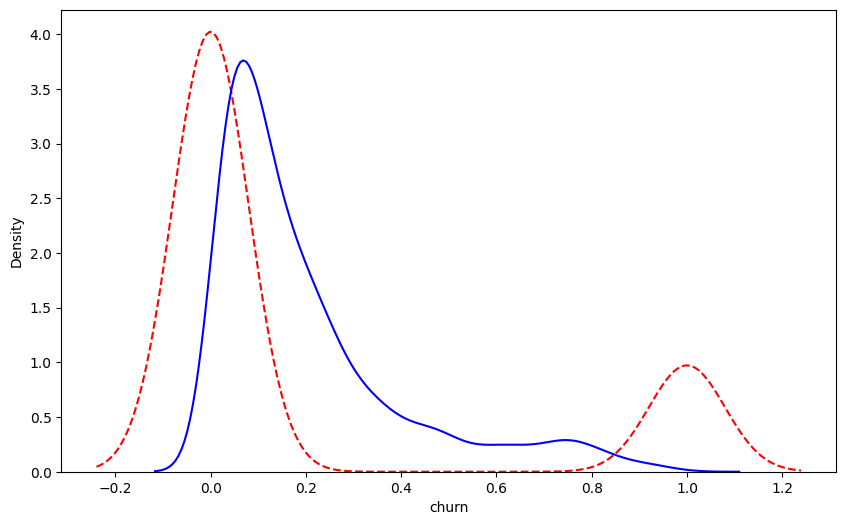

In [34]:
# Distribution Plot
# 1. Initialize and train the Random Forest model (if not already done in the current session)
rfc = RandomForestClassifier(min_samples_leaf=8, max_depth=10, random_state=0, criterion='entropy')
rfc.fit(X_train, y_train) # Train the model

# 2. Make predictions (0 or 1) and get probabilities for the test set
y_pred_rfc = rfc.predict(X_test) # Predictions (0s and 1s)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1] # Probabilities for churn (class 1)

# 3. Create the Distribution Plot using sns.kdeplot (recommended)
plt.figure(figsize=(10, 6))
sns.kdeplot(x=y_test, color='r', label='Actual Values (0=No Churn, 1=Churn)', linestyle='--') # Actual binary values
sns.kdeplot(x=y_prob_rfc, color='b', label='Predicted Churn Probability') # Predicted probabilities


In [35]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score 

print("\n--- Classification Report for Random Forest Classifier ---")
print(classification_report(y_test, y_pred_rfc))



--- Classification Report for Random Forest Classifier ---
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.82      0.41      0.55       584

    accuracy                           0.87      3000
   macro avg       0.85      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000



In [36]:
print("\n--- Additional Metrics for Random Forest Classifier ---")
print(f"Test Accuracy Score: {accuracy_score(y_test, y_pred_rfc):.4f}")
print(f"Test ROC AUC Score: {roc_auc_score(y_test, y_prob_rfc):.4f}")


--- Additional Metrics for Random Forest Classifier ---
Test Accuracy Score: 0.8680
Test ROC AUC Score: 0.8621


In [37]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
# numerical_cols = ['credit_score', 'balance', 'estimated_salary']
# scaler = StandardScaler()
# X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols]) 


with open('churn_model.pkl', 'wb') as file:
    pickle.dump(best_dtree_model, file) 
print("Model saved as churn_model.pkl")


with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
print("Scaler saved as scaler.pkl")


with open('column_names.pkl', 'wb') as file:
    pickle.dump(X_train.columns.tolist(), file)
print("Column names saved as column_names.pkl")

Model saved as churn_model.pkl
Scaler saved as scaler.pkl
Column names saved as column_names.pkl
